In [1]:
import os, shutil

In [2]:
original_dataset_dir ="maskdata"

In [3]:
base_dir ="mask_without_mask" 

In [4]:
train_dir = os.path.join(base_dir, 'train')

In [5]:
validation_dir = os.path.join(base_dir, 'validation')


In [6]:
test_dir = os.path.join(base_dir, 'test')


In [7]:
train_mask_dir = os.path.join(train_dir, 'mask')


In [8]:
train_without_mask_dir = os.path.join(train_dir, 'without_mask')


In [9]:
validation_mask_dir = os.path.join(validation_dir, 'mask')


In [10]:
validation_without_mask_dir = os.path.join(validation_dir, 'without_mask')


In [11]:
test_mask_dir = os.path.join(test_dir, 'mask')


In [12]:
test_without_mask_dir = os.path.join(test_dir, 'without_mask')


In [13]:
print('total training mask images:', len(os.listdir(train_mask_dir)))

total training mask images: 1500


In [14]:
print('total training without_mask images:', len(os.listdir(train_without_mask_dir)))

total training without_mask images: 1500


In [15]:
 print('total validation mask images:', len(os.listdir(validation_mask_dir)))

total validation mask images: 500


In [16]:
print('total validation without_mask images:', len(os.listdir(validation_without_mask_dir)))


total validation without_mask images: 500


In [17]:
print('total test mask images:', len(os.listdir(test_mask_dir)))

total test mask images: 500


In [18]:
 print('total test without_mask images:', len(os.listdir(test_without_mask_dir)))

total test without_mask images: 500


In [19]:
from keras import layers
from keras import models


In [20]:
model = models.Sequential()

In [21]:
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [23]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [24]:
from keras.preprocessing.image import ImageDataGenerator

In [25]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [26]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=20,
validation_data=validation_generator,validation_steps=15)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
 29/100 [=======>......................] - ETA: 5:00 - loss: 0.5887 - acc: 0.7069

C:\Users\92308\anaconda3\envs\tensorflow_env\lib\site-packages\PIL\Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


100/100 [==============================] - 522s 5s/step - loss: 0.3906 - acc: 0.8370 - val_loss: 0.3003 - val_acc: 0.8767
Epoch 2/20
100/100 [==============================] - 448s 4s/step - loss: 0.2341 - acc: 0.9170 - val_loss: 0.3451 - val_acc: 0.8500
Epoch 3/20
100/100 [==============================] - 435s 4s/step - loss: 0.1965 - acc: 0.9300 - val_loss: 0.2782 - val_acc: 0.8933
Epoch 4/20
100/100 [==============================] - 428s 4s/step - loss: 0.1639 - acc: 0.9435 - val_loss: 0.3530 - val_acc: 0.8667
Epoch 5/20
100/100 [==============================] - 400s 4s/step - loss: 0.1521 - acc: 0.9445 - val_loss: 0.2896 - val_acc: 0.9133
Epoch 6/20
100/100 [==============================] - 460s 5s/step - loss: 0.1487 - acc: 0.9440 - val_loss: 0.2437 - val_acc: 0.9233
Epoch 7/20
100/100 [==============================] - 466s 5s/step - loss: 0.1228 - acc: 0.9590 - val_loss: 0.2688 - val_acc: 0.9100
Epoch 8/20
100/100 [==============================] - 480s 5s/step - loss: 0.121

In [27]:
import matplotlib.pyplot as plt


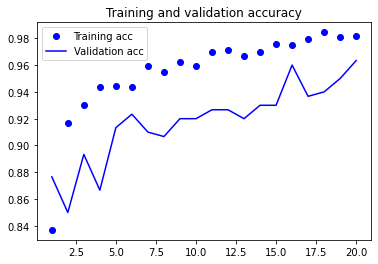

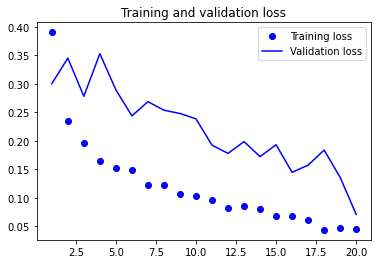

In [28]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [29]:
model.save("mask_detection.h5")

In [37]:
from keras.models import load_model
import cv2
import numpy as np

model = load_model('mask_detection.h5')

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

img = cv2.imread('a.png')
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])

classes = model.predict_classes(img)
print(classes)
if classes==1:
    print("He has Mask")
else:
    print("He does not have mask")

[[0]]
He does not have mask
